In [21]:
parameters = ([
    3.00002433,
    6.9974538,
    6.04179367,
    8.81766306,
    1.7719309,
    6.74596479,
    -6.17014658,
    21.44118582,
    -7.40951369,
    9.76387767,
] ,2)
# 来自hilbert代码计算
parameters

([3.00002433,
  6.9974538,
  6.04179367,
  8.81766306,
  1.7719309,
  6.74596479,
  -6.17014658,
  21.44118582,
  -7.40951369,
  9.76387767],
 2)

In [12]:
# alpha: 正则化强度，默认为 1.0，对应公式 8 中的 lambda

# fit_intercept: 默认为 True，计算截距项。

# normalize: 默认为 False，不针对数据进行标准化处理。

# copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。

# max_iter: 最大迭代次数，默认为 None。

# tol: 数据解算精度。

# solver: 根据数据类型自动选择求解器。

# random_state: 随机数发生器。

# sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

In [13]:
import numpy as np
from scipy.linalg import hilbert

x = hilbert(10)  # 生成 10x10 的希尔伯特矩阵
np.random.seed(10)  # 随机数种子能保证每次生成的随机数一致
w = np.random.randint(2, 10, 10)  # 随机生成 w 系数
y_temp = np.matrix(x) * np.matrix(w).T  # 计算 y 值
y = np.array(y_temp.T)[0]  # 将 y 值转换成 1 维行向量

w

array([3, 7, 6, 9, 2, 3, 5, 6, 3, 7])

In [14]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(fit_intercept=False)  # 参数代表不增加截距项
ridge_model.fit(x, y)
ridge_model.coef_  # 打印模型参数

array([6.3497497 , 4.32792068, 3.40228975, 2.83692059, 2.44632895,
       2.15683095, 1.93213214, 1.75189668, 1.60369747, 1.47944808])

In [15]:
# sklearn.linear_model.LinearRegression() 会有优化，不总是用普通最小二乘法计算

Text(0.5, 1.0, 'Ridge Regression')

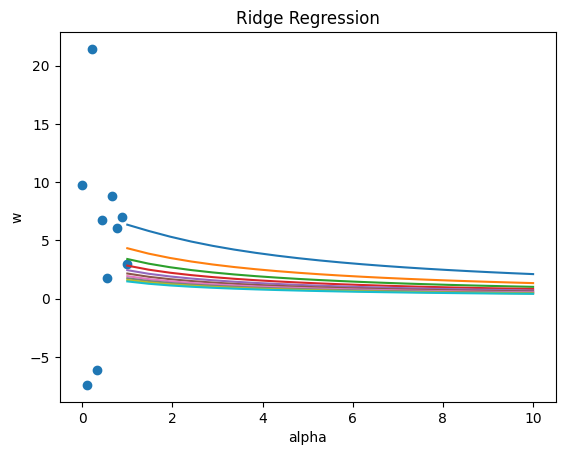

In [27]:
"""不同 alpha 参数拟合
"""

alphas = np.linspace(1, 10, 20)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
"""绘制不同 alpha 参数结果
"""

from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(alphas, coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Ridge Regression")

# 当 alpha 取值越大时，正则项主导收敛过程，各 w系数趋近于 0。当 alpha 很小时，各 w 系数波动幅度变大